# Tutorials

This tutorial aims to get users familiar with different functions for **GameArg**

### Import Package

In [1]:
from GameArg import *
from IPython.display import display, Image

## Graph Input

**Start from Win_Move Graph**

the following graph has to be a **win_move** graph, if you input a argumentation graph, please source node and target node first

In [2]:
%%file files/plain_wm_graph.dlv
edge(b,a).
edge(f,a).
edge(f,b).
edge(c,b).
edge(e,b).
edge(d,c).
edge(e,d).
edge(d,g).
edge(g,h).
edge(h,g).

Overwriting files/plain_wm_graph.dlv


**Start from Attack Graph**

if you have the **attack graph** like below, you can run the following to generate the plain_wm_graph.dlv

In [3]:
# %%file files/plain_atk_graph.dlv
# edge(c,a).
# edge(l,k).
# edge(d,c).
# edge(e,c).
# edge(e,l).
# edge(m,l).
# edge(e,d).
# edge(d,e).
# edge(m,e).
# edge(e,m).
# edge(f,d).
# edge(g,d).
# edge(d,g).
# edge(h,e).
# edge(n,m).
# edge(m,n).

In [4]:
# input_file_path = "files/plain_atk_graph.dlv"
# output_file_path = "files/plain_wm_graph.dlv"
# reverse_edges(input_file_path, output_file_path)

## Graph Generation

**Win-Move Graph**

In [5]:
create_plain_graph("files/plain_wm_graph.dlv", "edge", "graphs/wm_graph.dot")

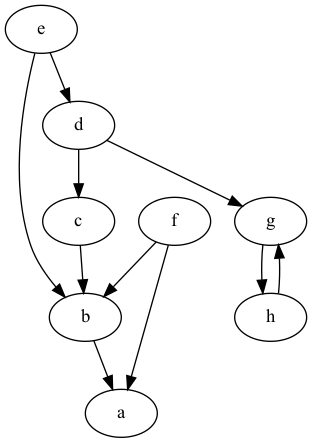

In [6]:
render_dot_to_png("graphs/wm_graph.dot", "graphs/wm_graph.png")
Image("graphs/wm_graph.png")

**Attack_Graph**

In [7]:
create_plain_graph(
    "files/plain_wm_graph.dlv", "edge", "graphs/attack_graph.dot", arg=True
)

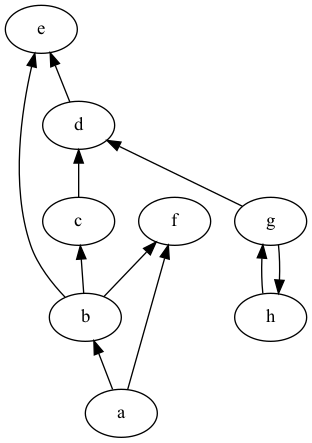

In [8]:
render_dot_to_png("graphs/attack_graph.dot", "graphs/attack_graph.png")
Image("graphs/attack_graph.png")

## Graph Coloring : Well-Founded Semantics

Here we will use the kernel as an example to help you better understand the tool

### Step by Step

#### Get Node Status

To standardize the process of calculation, we use `e` instead of `edge` therefore for wm graph `e(X,Y) :- edge(X,Y).`

In [9]:
%%file files/plain_to_wm.dlv

e(X,Y):- edge(Y,X).

Overwriting files/plain_to_wm.dlv


Later we define the Win-Move Calculation

In [10]:
%%file files/cal_wm.dlv

% Positions
pos(X) :- e(X,_).
pos(X) :- e(_,X).

% Kernel rules
win(X) :- e(Y,X), lost(Y).         % X is in the kernel complement if there is an edge from X into the kernel (to Y)
lost(X) :- pos(X), not win(X).
drawn(X) :- pos(X), not win(X), not lost(X).

Overwriting files/cal_wm.dlv


`-wf` indicates that the dlv will use well-founded semantics

In [11]:
cmd_solve = "dlv files/plain_wm_graph.dlv files/plain_to_wm.dlv files/cal_wm.dlv -wf"

let's run it with DLV, we will get the following output

In [12]:
run_command(cmd_solve)

'DLV [build BEN/Dec 17 2012   gcc 4.2.1 (Apple Inc. build 5666) (dot 3)]\n\nTrue: {edge(b,a), edge(f,b), edge(f,a), edge(c,b), edge(e,b), edge(e,d), edge(d,c), edge(d,g), edge(g,h), edge(h,g), e(b,f), e(b,c), e(b,e), e(a,b), e(a,f), e(c,d), e(d,e), e(g,d), e(g,h), e(h,g), pos(b), pos(a), pos(f), pos(c), pos(e), pos(d), pos(g), pos(h), win(b), lost(a), win(f), lost(c), lost(e), win(d)}\nUndefined: {win(g), lost(g), win(h), lost(h), drawn(g), drawn(h)}\n'

however, we need to filterout unnecessary information

In [13]:
wm_nodes_status = get_nodes_status(
    run_command(cmd_solve), node_types=["win", "lost", "drawn"]
)

thus we know the status of each nodes, which we will use for further coloring the graph

In [14]:
wm_nodes_status

{'win': ['b', 'f', 'd'], 'lost': ['a', 'c', 'e'], 'drawn': ['g', 'h']}

#### Visualization Schema

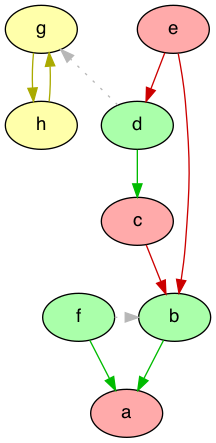

In [15]:
wm_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
wm_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
apply_color_schema(
    "graphs/wm_graph.dot",
    "wm",
    wm_nodes_status,
    wm_node_color_wfs,
    wm_edge_color_wfs,
)
Image("graphs/wm_graph_colored.png")

### One Function for All

As we have win_move graph and attack graph, we start to think about maybe we only need to provide the visualization schema and one function can provide us the expected graph

**WM game**

We will unveil the `visualize_wfs` function to illustrate well-founded semantics, requiring the specification of three values along with their color coding. Conversely, for stable models, the `visualize_stb` function requires just two values to be provided.

{'win': ['b', 'f', 'd'], 'lost': ['a', 'c', 'e'], 'drawn': ['g', 'h']}


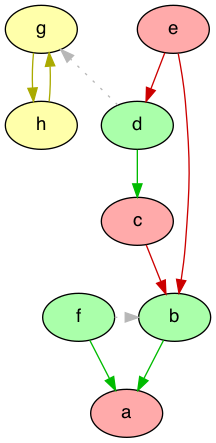

In [16]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs
)
Image("graphs/game_graph_colored.png")

Having chosen the color for the edges, you are now able to display either the node label or the edge label.

{'win': ['b', 'f', 'd'], 'lost': ['a', 'c', 'e'], 'drawn': ['g', 'h']}


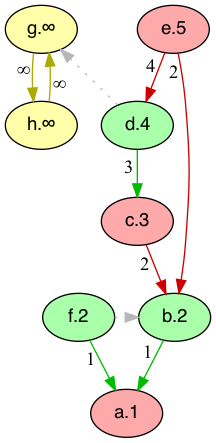

In [17]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs,
    show_edge_label=True,
    show_node_label=True,
)
Image("graphs/game_graph_colored.png")

You can also add more layout to the graph

{'win': ['b', 'f', 'd'], 'lost': ['a', 'c', 'e'], 'drawn': ['g', 'h']}


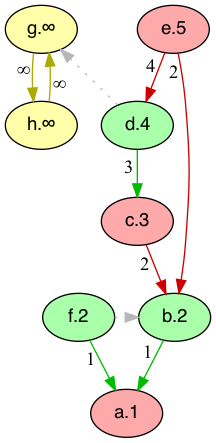

In [18]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs,
    show_edge_label=True,
    show_node_label=True,
    rank=True
)
Image("graphs/game_graph_colored.png")

**Argumentation**

From the game graph, by adding `arg=True`, you can effortlessly obtain the argumentation framework version.

{'accepted': ['b', 'f', 'd'], 'defeated': ['a', 'c', 'e'], 'undefined': ['g', 'h']}


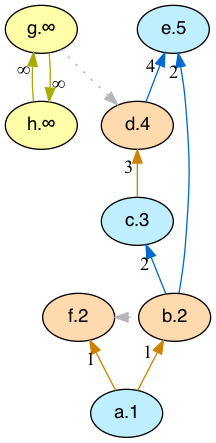

In [19]:
arg_node_color_wfs = {
    "accepted": "blue",
    "defeated": "orange",
    "undefined": "yellow",
}
arg_edge_color_wfs = {
    ("blue", "blue"): "gray",
    ("blue", "yellow"): "gray",
    ("yellow", "blue"): "gray",
    ("yellow", "yellow"): "yellow",
    ("blue", "orange"): "orange",
    ("orange", "blue"): "blue",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_wfs,
    arg_edge_color_wfs,
    arg=True,
    show_edge_label=True,
    show_node_label=True,
    rank=True
)
Image("graphs/arg_graph_colored.png")

**Kernel and Graph Decomposition**

{'c': ['b', 'f', 'd'], 'k': ['a', 'c', 'e'], 'pk': ['g', 'h']}


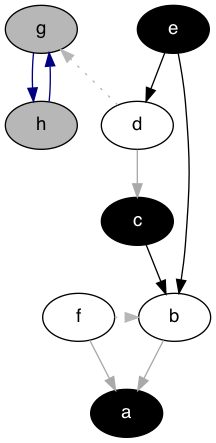

In [20]:
kernel_node_color_wfs = {"c": "white", "k": "black", "pk": "gray"}
kernel_edge_color_wfs = {
    ("white", "white"): "gray",
    ("white", "gray"): "gray",
    ("gray", "white"): "gray",
    ("gray", "gray"): "dark_blue",
    ("white", "black"): "dark_gray",
    ("black", "white"): "black",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "kernel",
    kernel_node_color_wfs,
    kernel_edge_color_wfs
)
Image("graphs/kernel_graph_colored.png")

### Graph Coloring: Stable Models

#### Get Node Status

similar to the WFS, but we need to remove the solve part `-wf`

In [21]:
cmd_solve = 'dlv files/plain_wm_graph.dlv files/plain_to_kernel.dlv files/cal_kernel.dlv -filter="k"'

let's run the command

In [22]:
print(run_command(cmd_solve))

DLV [build BEN/Dec 17 2012   gcc 4.2.1 (Apple Inc. build 5666) (dot 3)]

{k(a), k(c), k(e), k(h)}

{k(a), k(c), k(e), k(g)}



After the command, we can get the possible worlds

#### One Function for All

Similar to the WFS, we also want to generate all the stable models with defined visualization schema

**Stable Models for Kernel Graph**

In [23]:
kernel_node_color_stb = {"c": "white", "k": "black"}
kernel_edge_color_stb = {
    ("white", "white"): "gray",
    ("white", "gray"): "gray",
    ("gray", "white"): "gray",
    ("gray", "gray"): "dark_yellow",
    ("white", "black"): "dark_gray",
    ("black", "white"): "black",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "kernel",
    kernel_node_color_stb,
    kernel_edge_color_stb,
    show_node_label=True,
    rank=True
)

{'pw1': defaultdict(<class 'list'>, {'c': ['b', 'f', 'd', 'g'], 'k': ['a', 'c', 'e', 'h']}), 'pw2': defaultdict(<class 'list'>, {'c': ['b', 'f', 'd', 'h'], 'k': ['a', 'c', 'e', 'g']})}


**Stable Models for WM Graph**

In [24]:
game_node_color_stb = {"win": "green", "lost": "red"}
game_edge_color_stb = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_stb,
    game_edge_color_stb,
    show_node_label=True,
    rank=True
)

{'pw1': defaultdict(<class 'list'>, {'win': ['b', 'f', 'd', 'g'], 'lost': ['a', 'c', 'e', 'h']}), 'pw2': defaultdict(<class 'list'>, {'win': ['b', 'f', 'd', 'h'], 'lost': ['a', 'c', 'e', 'g']})}


**Stable Models for Attack Graph**

In [25]:
arg_node_color_stb = {
    "accepted": "blue",
    "defeated": "orange",
    "undefined": "yellow",
}
arg_edge_color_stb = {
    ("blue", "blue"): "gray",
    ("blue", "yellow"): "gray",
    ("yellow", "blue"): "gray",
    ("yellow", "yellow"): "yellow",
    ("blue", "orange"): "orange",
    ("orange", "blue"): "blue",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_stb,
    arg_edge_color_stb,
    arg=True,
    show_node_label=True,
    rank=True
)

{'pw1': defaultdict(<class 'list'>, {'accepted': ['b', 'f', 'd', 'g'], 'defeated': ['a', 'c', 'e', 'h']}), 'pw2': defaultdict(<class 'list'>, {'accepted': ['b', 'f', 'd', 'h'], 'defeated': ['a', 'c', 'e', 'g']})}
